Usage example of MediaPipe Selfie Segmentation Solution API in Python (see also http://solutions.mediapipe.dev/selfie_segmentation).

In [ ]:
!pip install mediapipe

Upload any person image to the Colab. We take two example images from the web: https://unsplash.com/photos/oB1mqkdDiU0 and https://unsplash.com/photos/fU3EJRO_qGY.


In [ ]:
from google.colab import files
uploaded = files.upload()

ilya-mirnyy-fU3EJRO_qGY-unsplash.jpg


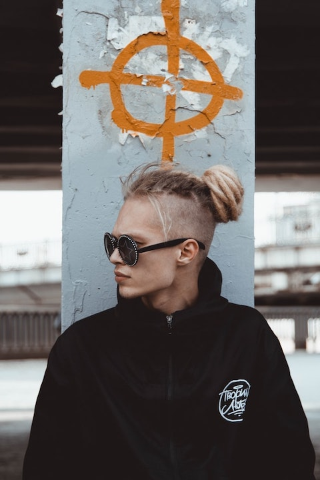

nikho-mageza-oB1mqkdDiU0-unsplash.jpg


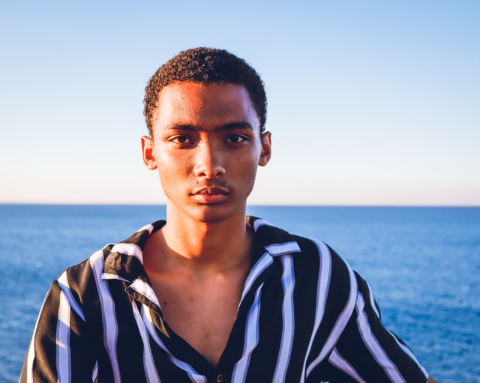

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Selfie Segmentation solution, we can access this module as `mp_selfie_segmentation = mp.solutions.selfie_segmentation`.

You may change the `model selection` parameter during the initialization. Run `help(mp_selfie_segmentation.selfie_segmentation)` to get more informations about the parameter.

In [ ]:
import mediapipe as mp
mp_selfie_segmentation = mp.solutions.selfie_segmentation

help(mp_selfie_segmentation.SelfieSegmentation)

Segmentation mask of ilya-mirnyy-fU3EJRO_qGY-unsplash.jpg:


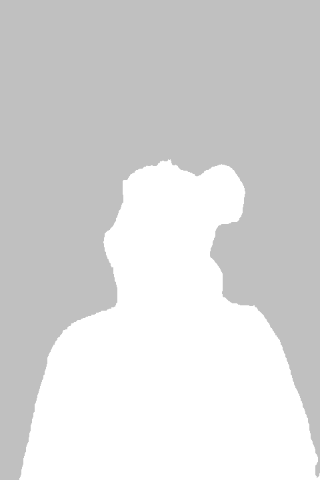

Segmentation mask of nikho-mageza-oB1mqkdDiU0-unsplash.jpg:


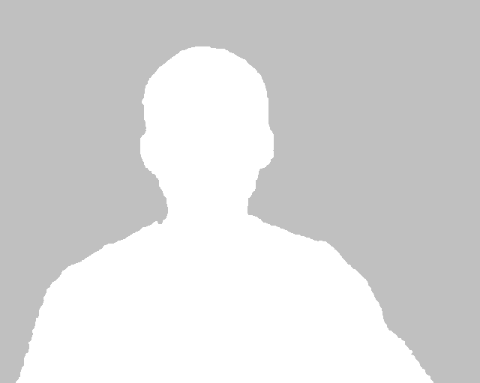

In [ ]:
# Show segmentation masks.
BG_COLOR = (192, 192, 192) # gray
MASK_COLOR = (255, 255, 255) # white

with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Generate solid color images for showing the output selfie segmentation mask.
    fg_image = np.zeros(image.shape, dtype=np.uint8)
    fg_image[:] = MASK_COLOR
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.2
    output_image = np.where(condition, fg_image, bg_image)

    print(f'Segmentation mask of {name}:')
    resize_and_show(output_image)

Blurred background of ilya-mirnyy-fU3EJRO_qGY-unsplash.jpg:


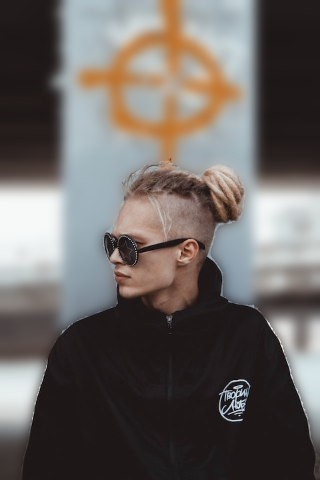

Blurred background of nikho-mageza-oB1mqkdDiU0-unsplash.jpg:


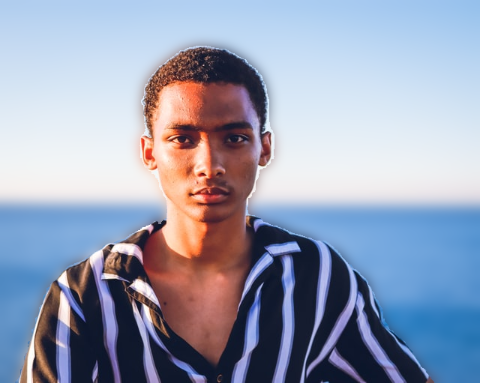

In [ ]:
# Blur the image background based on the segementation mask.
with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    blurred_image = cv2.GaussianBlur(image,(55,55),0)
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    output_image = np.where(condition, image, blurred_image)
    
    print(f'Blurred background of {name}:')
    resize_and_show(output_image)